
# Business Cases with Data Science 

## Case 3: Prediction of Bookings Cancellation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Pedro Santos (M20190420)
2. Ana Claudia Alferes (M20190932)
3. Lennart Dangers (M20190251)
4. Michael Machatschek (M20190054)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

This jupypter-notebook provides the code in python to do a customer segmentation of a given dataset. A more detailed description of this project and the solutions can be found in the report. 

# Step 1: Business Understanding

Please consult our report for further details. 

# Step 2: Data Understanding

## Dataset Description

A data dictionary is available in the appendix of our report.
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [471]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.offline as po 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

In [472]:
df = pd.read_csv("data.csv")

In [473]:
df.describe(include="all").T

count unique               top   freq  \
IsCanceled                   79330    NaN               NaN    NaN   
LeadTime                     79330    NaN               NaN    NaN   
ArrivalDateYear              79330    NaN               NaN    NaN   
ArrivalDateMonth             79330     12            August   8983   
ArrivalDateWeekNumber        79330    NaN               NaN    NaN   
ArrivalDateDayOfMonth        79330    NaN               NaN    NaN   
StaysInWeekendNights         79330    NaN               NaN    NaN   
StaysInWeekNights            79330    NaN               NaN    NaN   
Adults                       79330    NaN               NaN    NaN   
Children                     79326    NaN               NaN    NaN   
Babies                       79330    NaN               NaN    NaN   
Meal                         79330      4         BB         62305   
Country                      79306    166               PRT  30960   
MarketSegment                79330      8         Online TA  38748   
DistributionChannel          79330      5             TA/TO  68945   
IsRepeatedGuest              79330    NaN               NaN    NaN   
PreviousCancellations        79330    NaN               NaN    NaN   
PreviousBookingsNotCanceled  79330    NaN               NaN    NaN   
ReservedRoomType             79330      8  A                 62595   
AssignedRoomType             79330      9  A                 57007   
BookingChanges               79330    NaN               NaN    NaN   
DepositType                  79330      3   No Deposit       66442   
Agent                        79330    224                 9  31955   
Company                      79330    208              NULL  75641   
DaysInWaitingList            79330    NaN               NaN    NaN   
CustomerType                 79330      4         Transient  59404   
ADR                          79330    NaN               NaN    NaN   
RequiredCarParkingSpaces     79330    NaN               NaN    NaN   
TotalOfSpecialRequests       79330    NaN               NaN    NaN   
ReservationStatus            79330      3         Check-Out  46228   
ReservationStatusDate        79330    864        2015-10-21   1416   

                                   mean        std   min   25%   50%   75%  \
IsCanceled                      0.41727   0.493111     0     0     0     1   
LeadTime                        109.736    110.949     0    23    74   163   
ArrivalDateYear                 2016.17   0.699181  2015  2016  2016  2017   
ArrivalDateMonth                    NaN        NaN   NaN   NaN   NaN   NaN   
ArrivalDateWeekNumber           27.1774    13.3985     1    17    27    38   
ArrivalDateDayOfMonth           15.7866    8.72845     1     8    16    23   
StaysInWeekendNights           0.795185   0.885026     0     0     1     2   
StaysInWeekNights               2.18296    1.45642     0     1     2     3   
Adults                          1.85098   0.509292     0     2     2     2   
Children                      0.0913698   0.372177     0     0     0     0   
Babies                       0.00494138  0.0843233     0     0     0     0   
Meal                                NaN        NaN   NaN   NaN   NaN   NaN   
Country                             NaN        NaN   NaN   NaN   NaN   NaN   
MarketSegment                       NaN        NaN   NaN   NaN   NaN   NaN   
DistributionChannel                 NaN        NaN   NaN   NaN   NaN   NaN   
IsRepeatedGuest               0.0256145   0.157983     0     0     0     0   
PreviousCancellations         0.0797428   0.415472     0     0     0     0   
PreviousBookingsNotCanceled    0.132371    1.69341     0     0     0     0   
ReservedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
AssignedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
BookingChanges                 0.187369    0.60862     0     0     0     0   
DepositType                         NaN        NaN   NaN   NaN   NaN   N

In [474]:
df.columns.values

array(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType',
       'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate'], dtype=object)

In [475]:
non_numerical_var = ["Agent", "ArrivalDateMonth",
                    "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth","ArrivalDateYear","AssignedRoomType",
                     "Company", "Country", "CustomerType","DepositType",
                     "DistributionChannel", "IsCanceled", "IsRepeatedGuest", "MarketSegment",
                     "Meal", "ReservationStatus",
                     "ReservationStatusDate", "ReservedRoomType"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [477]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [478]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Agent--------------------
          9    31955
       NULL     8131
          1     7137
         14     3640
          7     3539
          6     2683
         28     1666
          3     1308
          8     1236
         37     1230
         19     1061
         21      875
        229      786
         83      696
         29      679
         12      578
         85      554
         20      540
         30      484
         27      450
         22      382
         56      375
         86      338
         58      335
        119      304
         26      295
         34      293
         44      292
         11      290
        138      287
               ...  
        242        1
        285        1
        216        1
        280        1
        247        1
         93        1
        289        1
        397        1
        267        1
        294        1
         54        1
        197        1
        480        1
        306        1
         

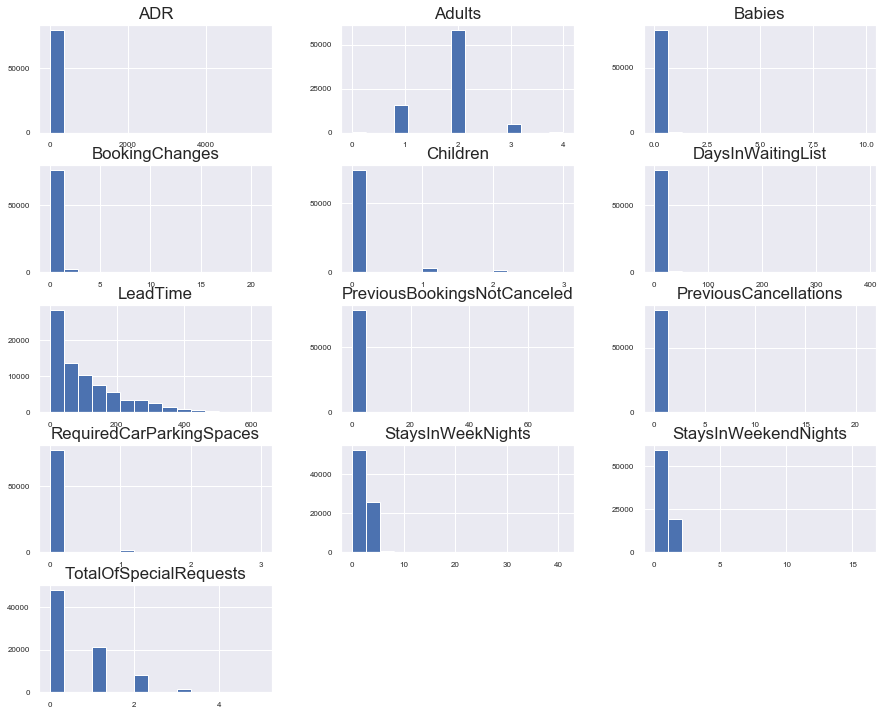

In [479]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

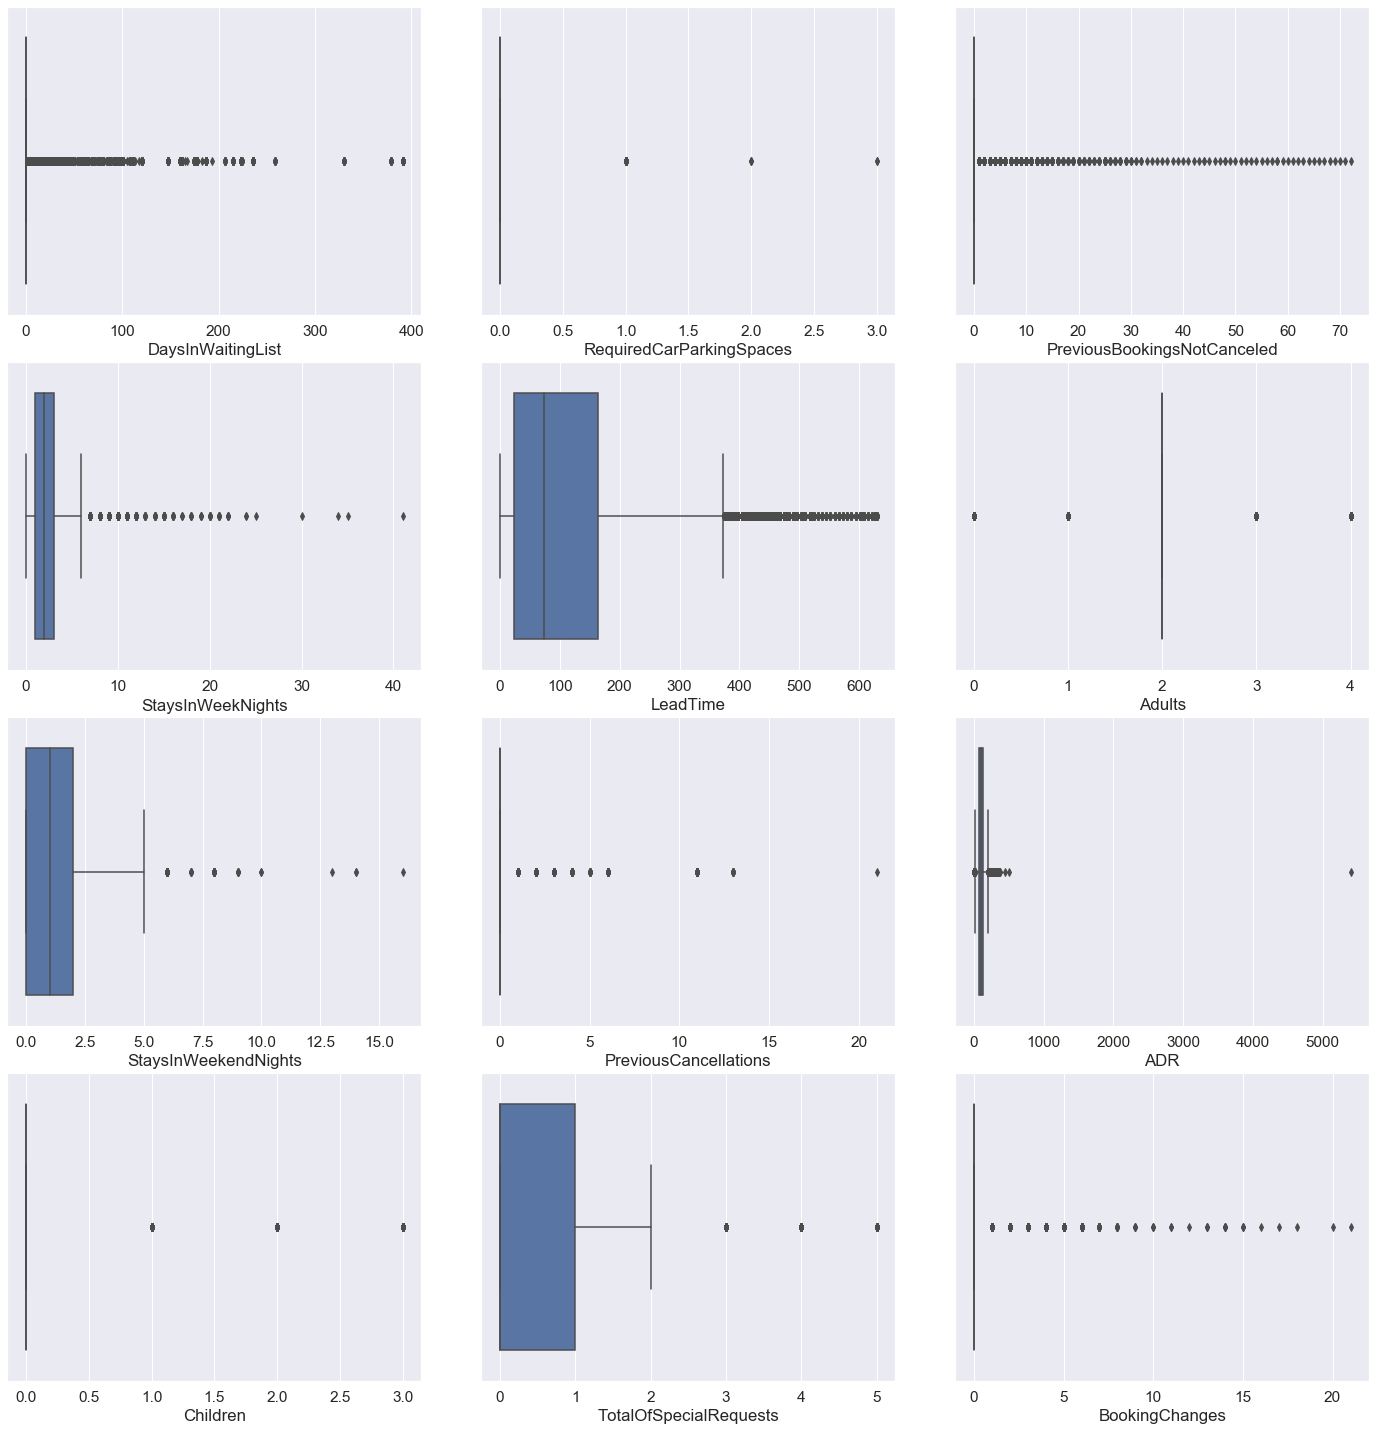

In [480]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

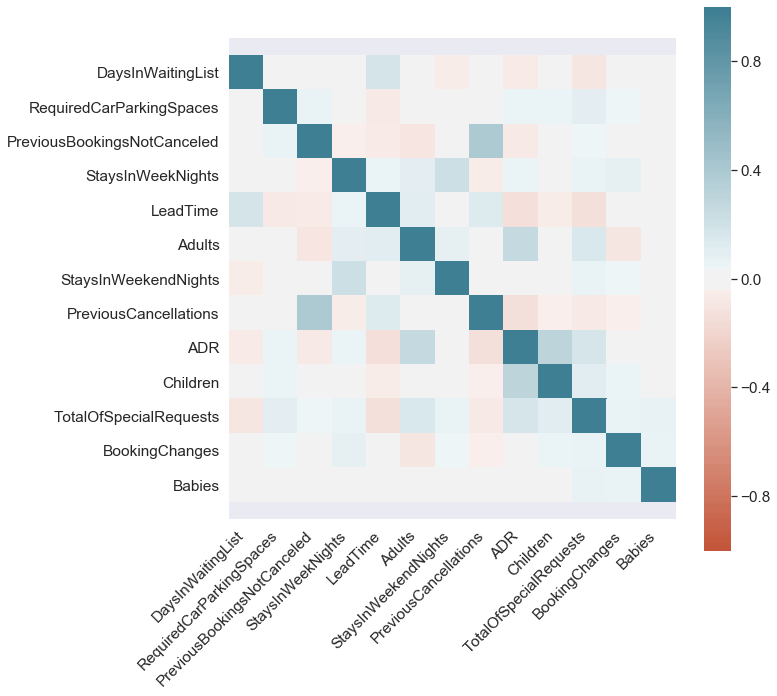

In [481]:
corr = df[numerical_var].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [482]:
can = df[df.IsCanceled == 1].IsCanceled.count()
Ncan = df[df.IsCanceled == 0].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=300, width=400, title_text="Canceled vs. Not Canceled")
fig.show()

In [483]:
can = df[df.IsCanceled == 1][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateYear", right_on="ArrivalDateYear" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Year", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateMonth", right_on="ArrivalDateMonth" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Month", plot_bgcolor="white")
fig.show() 

In [484]:
can = df[df.IsCanceled == 1][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Agent", right_on="Agent" ).head() 
print(pf_group)

x=[1,2,3,4,5]

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

         Agent  IsCanceled_x  IsCanceled_y
0            9         13262         18693
1            1          5230          1907
2         NULL          2609          5522
3            6           966          1717
4           19           780           281


In [485]:
can = df[df.IsCanceled == 1][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ReservedRoomType", right_on="ReservedRoomType" ).head() 

x=pf_group.ReservedRoomType.values

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

In [486]:
R = df[df.ReservedRoomType == df.AssignedRoomType].IsCanceled.count()
W = df[df.ReservedRoomType != df.AssignedRoomType].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Right Assigned Room','Wrong Assigned Room'], values=[R, W]))
fig.update_layout(height=500, width=500, title_text="Assigned Room Type")
fig.show()

In [487]:
df['FamilySize'] = df['Adults'] + df['Children'] + df['Babies']
df_F = df[df.FamilySize != 0]

can = df_F[df_F.IsCanceled == 1][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df_F[df_F.IsCanceled == 0][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "FamilySize", right_on="FamilySize" ) 
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Family Size", plot_bgcolor="white")
fig.show() 

In [488]:
can = df[(df.IsCanceled == 1) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsCanceled == 0) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Booking with at least 1 Booking Change")
fig.show()

In [489]:
can = df[df.IsCanceled == 1][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Country", right_on="Country" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Country", plot_bgcolor="white")
fig.show() 

#Remember this one it's problematic since we just know the real country from the customer when the customer arrives

In [490]:
can = df[df.IsCanceled == 1][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "CustomerType", right_on="CustomerType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Customer Type", plot_bgcolor="white")
fig.show() 

In [491]:
can = df[df.IsCanceled == 1][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DepositType", right_on="DepositType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Deposit Type", plot_bgcolor="white")
fig.show() 

In [492]:
can = df[df.IsCanceled == 1][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DistributionChannel", right_on="DistributionChannel" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Distribution Channel", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "MarketSegment", right_on="MarketSegment" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [493]:
can = df[(df.IsRepeatedGuest == 1)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsRepeatedGuest == 0)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Repeat Customer','First Time Customer'], values=[can, Ncan]))
fig.update_layout(height=300, width=600, title_text="Check for repeat customers")
fig.show()

In [494]:
fig = go.Figure(data=[ 
    go.Histogram(x=df[df.IsCanceled == 1].LeadTime,nbinsx=50, name="Canceled"),
    go.Histogram(x=df[df.IsCanceled == 0].LeadTime,nbinsx=50, name="Not Canceled")])

fig.update_layout(title_text="Lead time in Canceled and Not Canceled Bookings")
fig.show() 

In [495]:
can = df[df.IsCanceled == 1][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "Meal", right_on="Meal" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [496]:
can = df[df.IsCanceled == 1].PreviousCancellations.sum()
Ncan = df[df.IsCanceled == 0].PreviousCancellations.sum()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Previous Cancellations")
fig.show()

In [497]:
can = df[df.IsCanceled == 1] 
Ncan = df[df.IsCanceled == 0] 

fig = make_subplots(2,2, subplot_titles=["Canceled Weekend","Canceled Week"
                                        , "Not Canceled Weekend", "Not Canceled Week"])

fig.add_trace(go.Histogram(x=can.StaysInWeekendNights, name="Restaurant Day"),1,1)
fig.add_trace(go.Histogram(x=can.StaysInWeekNights, name="Delivery Day"),1,2)

fig.add_trace(go.Histogram(x=Ncan.StaysInWeekendNights, name="Restaurant Month"),2,1)
fig.add_trace(go.Histogram(x=Ncan.StaysInWeekNights, name="Delivery Month"),2,2)

fig.update_layout(title_text="Number of nights booked", plot_bgcolor="white", showlegend=False)

fig.show() 

In [498]:
can = df[df.IsCanceled == 1][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "TotalOfSpecialRequests", right_on="TotalOfSpecialRequests" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Total of Special Requests", plot_bgcolor="white")
fig.show()

## Summary Data Understanding / Data Exploration


# Step 3: Data Preparation

In [499]:
X = df.copy(deep= True)

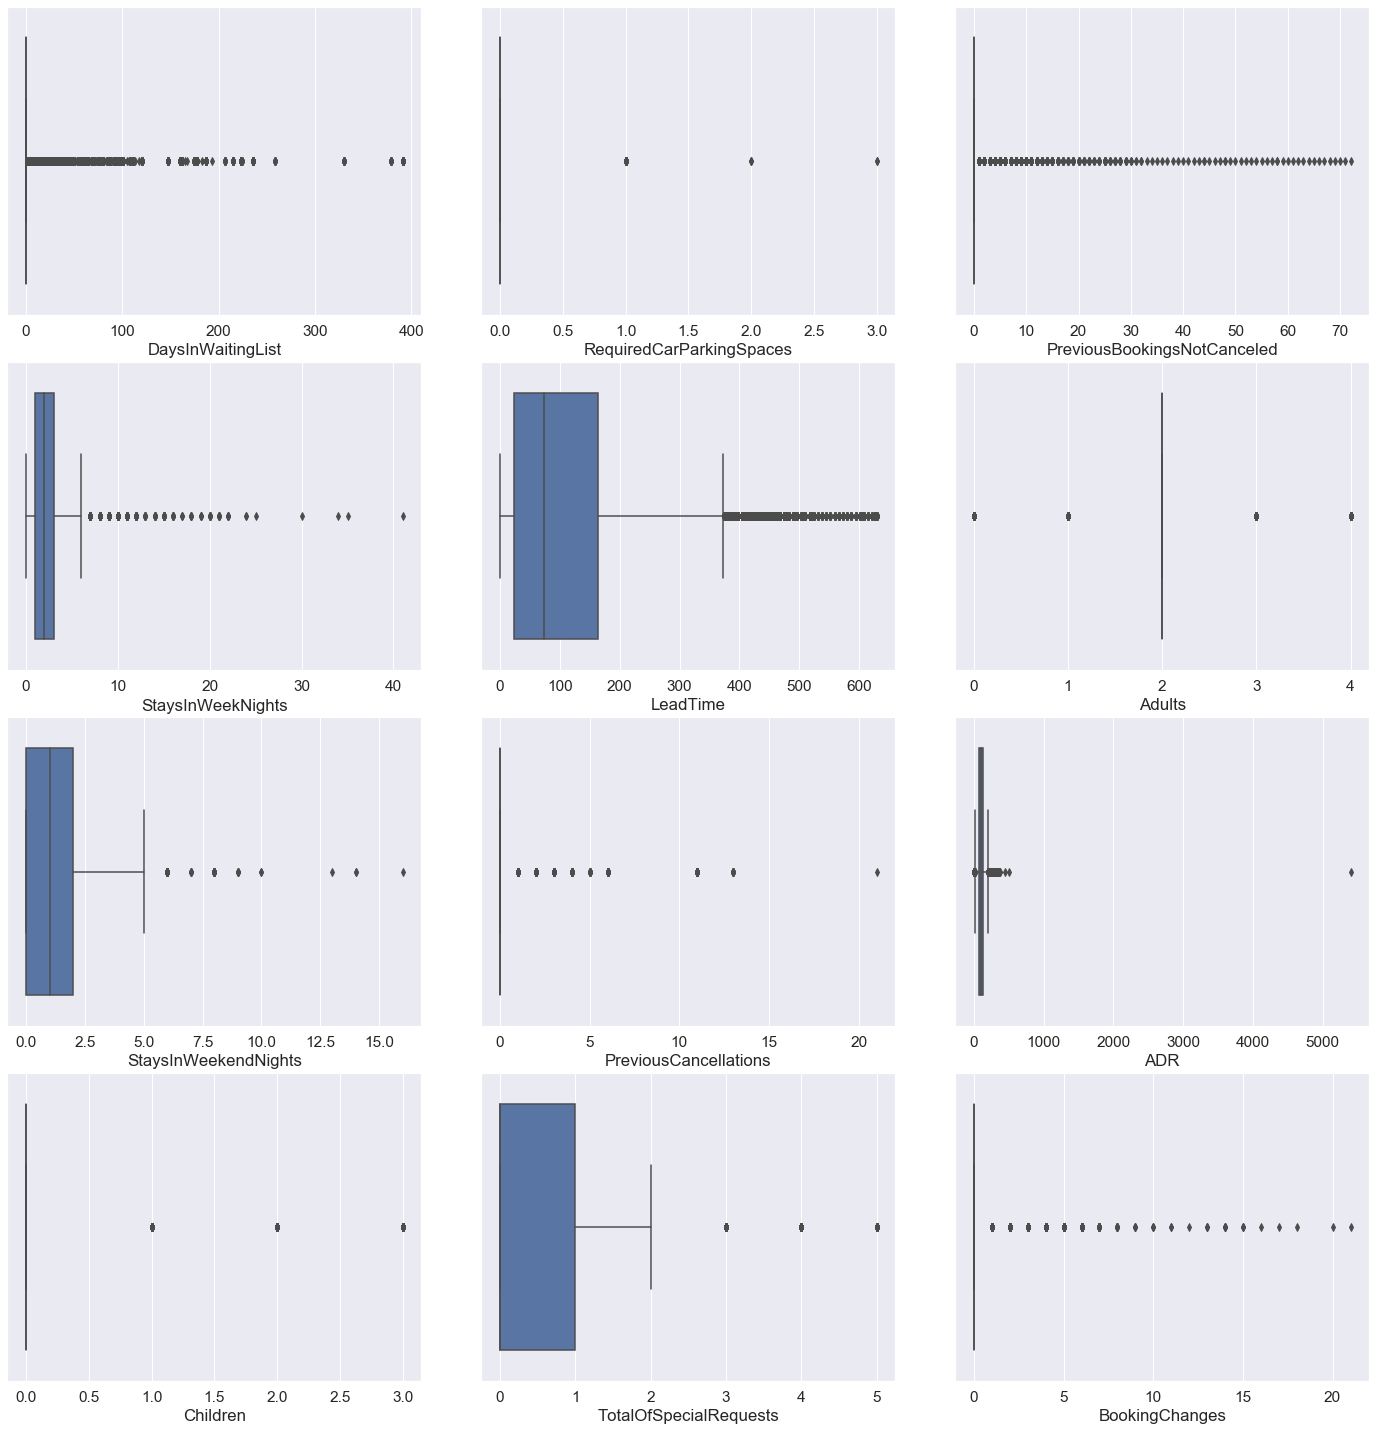

In [500]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(X[numerical_var], ax.flatten()):
    sns.boxplot(X[var], ax=subplot)

In [501]:
#drop ghost guests (~100rows)
noguests= X[X.Babies + X.Children + X.Adults == 0].index
X.drop(X.index[noguests], inplace=True)

In [502]:
#Drop customers that didnt stay any night (~260 rows)
nonights = X[X.StaysInWeekendNights + X.StaysInWeekNights == 0].index
X.drop(X.index[nonights], inplace=True)

In [503]:
X.corr()["IsCanceled"].sort_values(ascending = False )

IsCanceled                     1.000000
LeadTime                       0.308856
PreviousCancellations          0.166049
DaysInWaitingList              0.060709
StaysInWeekNights              0.051062
Adults                         0.049315
FamilySize                     0.018942
ArrivalDateWeekNumber          0.001631
ArrivalDateYear               -0.003263
ArrivalDateDayOfMonth         -0.004487
StaysInWeekendNights          -0.006638
ADR                           -0.014765
Children                      -0.027520
Babies                        -0.030249
PreviousBookingsNotCanceled   -0.053364
IsRepeatedGuest               -0.064097
RequiredCarParkingSpaces      -0.133533
BookingChanges                -0.150328
TotalOfSpecialRequests        -0.294582
Name: IsCanceled, dtype: float64

In [504]:
X.RequiredCarParkingSpaces.value_counts()
#Only 5 cases with more than 1 car. These records wont affect the final result, so they can be dropped
X = X[X.RequiredCarParkingSpaces<=1]

In [505]:
#analysing Average Daily Rate
print("Max",X.ADR.max(), "\n", "Min", X.ADR.min(), "\n", "Mean", X.ADR.mean())
#second highest value
X.ADR.value_counts().sort_index(ascending=False)
#Second highest value is 510, lets drop values above
X = X[X.ADR < 520] #1 record
#check lower values
X.ADR.value_counts().sort_index()[:40]
#There are some values with really low ADR. This could mean Staff and other people related to the hotel.
#As such we will drop these "customers" as they dont bring value to our analysis.
print("number of customers who paid less than 20€ for hotel:",X.ADR.value_counts().sort_index()[:20].sum())
X = X[X.ADR > 20] #1284 record from which 1064 are paid 0

Max 5400.0 
 Min 0.0 
 Mean 105.51724769944137
number of customers who paid less than 20€ for hotel: 1284


In [506]:
#Looking into FamilySize, most people travel in groups of 1-4, with few exceptions with 5. 
#There are 2 cases above 10. We will remove these outliers as they may have prejudicial results
X.FamilySize.value_counts()
X= X[X.FamilySize <10]

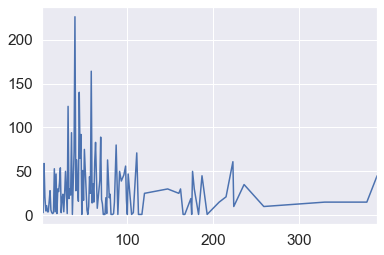

In [507]:
X.DaysInWaitingList[X.DaysInWaitingList>0].value_counts().sort_index().plot()
#Even if we remove 0, the most common ocurrence, people usually stay in waiting list for ~50 days, but it is not uncommon
#to see customers with longer waiting time.

0      2618
1      1723
2      1054
4       987
3       966
5       918
6       856
7       733
8       731
12      715
16      653
11      651
34      645
14      644
28      614
9       600
19      574
10      571
18      563
15      555
17      555
56      550
13      527
20      524
39      485
29      476
37      470
35      466
68      460
32      459
       ... 
622      17
284      16
343      16
429      15
357      15
478      13
394      13
408      11
450      10
507      10
410      10
467      10
521      10
493      10
490       9
331       9
324       8
340       8
319       6
361       5
345       4
381       3
354       2
463       1
458       1
380       1
387       1
366       1
389       1
347       1
Name: LeadTime, Length: 453, dtype: int64

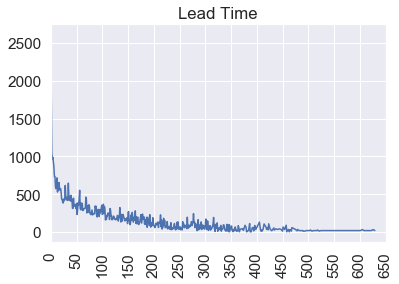

In [508]:
X.PreviousCancellations.value_counts()
#People usually dont have previous cancellations as most of them are new customers. Bin? 0,1+

X.TotalOfSpecialRequests.value_counts()
#No requests most common, then one request. Having more than 2 is also pretty common.Bin? 0,1,2+

X.BookingChanges.value_counts()
#No changes is most common. Having 1 or 2 changes also happen. Bin? 0, 1, 2+

X.LeadTime.value_counts().sort_index().plot(title="Lead Time", xticks = [0,50,100,150,200,250,300,350,400,450,500,550,600,650], rot=90)
X.LeadTime.value_counts()
#Several types of customers,depending on their booking time... No real outliers. Bin?


## Feature Preparation/Engineering

In [509]:
# Check the cancellation ratio:

def cancellation_ratio (feature):
    can = df[df.IsCanceled == 1][[feature,"IsCanceled"]].groupby([feature]).count()
    ncan = df[df.IsCanceled == 0][[feature,"IsCanceled"]].groupby([feature]).count()
    can_ratio = pd.merge(left=can,right=ncan,on=feature,suffixes=('=1', '=0'))
    can_ratio["cancelRatio"]=can_ratio["IsCanceled=1"]/(can_ratio["IsCanceled=0"]+can_ratio["IsCanceled=1"])
    can_ratio.sort_values(by='cancelRatio')
    return can_ratio

In [510]:
#ADR binned regarding the bins from booking.com
df["ADRBinned"] = df.ADR.apply(lambda x: '0-19' if x>=0 and x<20 else 
                                         ('20-50' if x>=20 and x<51 else
                                          ('51-100' if x>=51 and x<101 else
                                           ('101-150' if x>=101 and x<151 else
                                            ('151-200' if x>=151 and x<201 else '200+')))))

#StaysInWeekendNights and StaysInWeekNights binning into total nights
#2-3     42807
#4-7     21672
#1       13272
#8-30     1241
#30+       338

df["totalNights"]=df.StaysInWeekendNights + df.StaysInWeekNights

df["totalNightsBinned"] = df.totalNights.apply(lambda x: '1' if x==1 else 
                                         ('2-3' if x>=2 and x<4 else
                                          ('4-7' if x>=4 and x<8 else
                                           ('8-30' if x>=8 and x<31 else '30+'))))

#Agent binning by cancellation ration higher 50 percent
ratio=cancellation_ratio("Agent")
df = df.merge(ratio, left_on=["Agent"], right_on=["Agent"], how='left') 
df["AgentBinned"] = df.cancelRatio.apply(lambda x: 'Above50PercCanceled' if x>0.5 else 'Below50PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#MarketSegment binning by cancellation ratio 

#Aviation         0.219409
#Complementary    0.118081
#Corporate        0.214668
#Direct           0.173314
#Groups           0.688587
#Offline TA/TO    0.428316
#Online TA        0.373981

ratio=cancellation_ratio("MarketSegment")
df = df.merge(ratio, left_on=["MarketSegment"], right_on=["MarketSegment"], how='left') 
df["MarketSegmentBinned"] = df.cancelRatio.apply(lambda x: 'Above25PercCanceled' if x>0.25 else 'Below25PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#LeadTime binning
#31-120     28244
#121-365    25020
#8-30       12554
#0-7        10808
#366+        2704

df["LeadTimeBinned"] = df.LeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else 
                                         ('8-30' if x>=8 and x<31 else 
                                          ('31-120' if x>=31 and x<121 else
                                           ('121-365' if x>=121 and x<366 else '366+'))))

#ArrivalDateMonth binning
#divided into below and above average cancellation (41.7 %)

#1    42743
#0    36587

#Cancellation Ratio: 
#April        0.463235
#August       0.400980
#December     0.421104
#February     0.382880
#January      0.396681
#July         0.408754
#June         0.446922
#March        0.369464
#May          0.443756
#November     0.381226
#October      0.429717
#September    0.420270

ratio=cancellation_ratio("ArrivalDateMonth")
df = df.merge(ratio, left_on=["ArrivalDateMonth"], right_on=["ArrivalDateMonth"], how='left') 
df["ArrivalDateMonth>avgCancel"] = df.cancelRatio.apply(lambda x: '1' if x>0.417 else '0')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True) 


#binning by season (peak, winter and spring) 
#PeakSeason      32365
#WinterSeason    24795
#SpringSeason    22170
df["ArrivalDateMonthSeason"] = df.ArrivalDateMonth.apply(lambda x: 'PeakSeason' if x in ["June","July","August","September"] else
                                                         ('WinterSeason'if x in ["October","November","December","January","February"] else 
                                                         'SpringSeason'))

#BookingChanges binning (dummy)
#0    69062
#1    10268
df["BookingChangesBinned"] = df.BookingChanges.apply(lambda x: '1' if x>=1 else '0')

#RequiredCarParkingSpaces binning (dummy)
#0    77404
#1     1926
df["RequiredCarParkingSpacesBinned"] = df.RequiredCarParkingSpaces.apply(lambda x: '1' if x>=1 else '0')

#TotalOfSpecialRequests binning (dummy)
#0    47957
#1    31373
df["TotalOfSpecialRequestsBinned"] = df.TotalOfSpecialRequests.apply(lambda x: '1' if x>=1 else '0')

#Company binned
#0    75641
#1     3689
df["CompanyBinned"] = df.Company.apply(lambda x: '1' if x!="       NULL" else '0')

#Children binning (into hasChildren)
#0    74224
#1     5106
df["hasChildren"] = df.Children.apply(lambda x: '1' if x>=1 else '0')

#CustomerType binning (transient+contract and rest)
#1    61704
#0    17626
df["transientAndContract"] = df.CustomerType.apply(lambda x: '1' if x=="Transient" or x=="Contract" else '0')

#DaysInWaitingList
#0        75887
#31-90     2042
#90+        843
#1-30       558
df["DaysInWaitingListBinned"] = df.DaysInWaitingList.apply(lambda x: '0' if x==0 else 
                                         ('1-30' if x>=1 and x<31 else 
                                           ('31-90' if x>=31 and x<91 else '90+')))

In [511]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...  LeadTimeBinned  \
0                  2       1       0.0  ...             0-7   
1                  4       2       0.0  ...          31-120   
2                  4       1       0.0  ...          31-120   
3                  4       2       0.0  ...          31-120   
4                  2       2       0.0  ...          31-120   

  ArrivalDateMonth>avgCancel ArrivalDateMonthSeason BookingChangesBinned  \
0                          0             PeakSeason                    0   
1                          0             PeakSeason                    0   
2                          0             PeakSeason                    0   
3                          0             PeakSeason                    0   
4                          0             PeakSeason                    0   

  RequiredCarParkingSpacesBinned  TotalOfSpecialRequestsBinned  CompanyBinned  \
0                              0                             0              0   
1                              0                             1              0   
2                              0                             1              0   
3                              0                             1              0   
4                              0                             1              0   

   hasChildren transientAndContract DaysInWaitingListBinned  
0            0                    1                       0  
1            0                    1                       0  
2            0                    1                       0  
3            0                    1                       0  
4            0                    1                       0  

[5 rows x 47 columns]

In [512]:
le = preprocessing.LabelEncoder()
df['ADR_encoded'] = le.fit_transform(df['ADRBinned'])

#define encoder
status_ohe = OneHotEncoder()

#apply encoder
ARD = status_ohe.fit_transform(df.ADR_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_ARD = pd.DataFrame(ARD, 
                                       columns= ["ARD" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_ARD], axis=1)

#Ordinal Encoder to make sure the order it's correct
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit_transform(df[['ADRBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['ADRBinned'], categories=['0-19','20-50','51-100','101-150','151-200','200+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['ADR_encoded'] = labels


/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [513]:
df['nights_encoded'] = le.fit_transform(df['totalNightsBinned'])

#apply encoder
Nights = status_ohe.fit_transform(df.nights_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_Ni = pd.DataFrame(Nights, 
                                       columns= ["Nights" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_Ni], axis=1)

ordinalencoder.fit_transform(df[['totalNightsBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['totalNightsBinned'], categories=['1','2-3', '4-7', '8-30','30+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['nights_encoded'] = labels


/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [514]:
df['leadtime_encoded'] = le.fit_transform(df['LeadTimeBinned'])

#apply encoder
Lead = status_ohe.fit_transform(df.leadtime_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_LT = pd.DataFrame(Lead, 
                                       columns= ["LeadTime" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_LT], axis=1)

ordinalencoder.fit_transform(df[['LeadTimeBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['LeadTimeBinned'], categories=['0-7', '8-30', '31-120', '121-365', '366+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['leadtime_encoded'] = labels

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [515]:
df['agent_encoded'] = le.fit_transform(df['AgentBinned'])

#apply encoder
Agent = status_ohe.fit_transform(df.agent_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_A = pd.DataFrame(Agent, 
                                       columns= ["Agent" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_A], axis=1)

df = df.drop(columns =['agent_encoded'])

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [516]:
df['market_encoded'] = le.fit_transform(df['MarketSegmentBinned'])

#apply encoder
Market = status_ohe.fit_transform(df.market_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_M = pd.DataFrame(Agent, 
                                       columns= ["Market" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_M], axis=1)

df = df.drop(columns =['market_encoded'])

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [517]:
df['season_encoded'] = le.fit_transform(df['ArrivalDateMonthSeason'])

#apply encoder
Season = status_ohe.fit_transform(df.season_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_S = pd.DataFrame(Season, 
                                       columns= ["Season" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_S], axis=1)

df = df.drop(columns =['season_encoded'])

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [518]:
df['daysWaiting_encoded'] = le.fit_transform(df['DaysInWaitingListBinned'])

#apply encoder
Waiting = status_ohe.fit_transform(df.daysWaiting_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_DW = pd.DataFrame(Waiting, 
                                       columns= ["DaysWaiting" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_DW], axis=1)

ordinalencoder.fit_transform(df[['DaysInWaitingListBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['DaysInWaitingListBinned'], categories=['0', '1-30', '31-90', '90+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['daysWaiting_encoded'] = labels

/Users/anaalferes/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [519]:
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...  MarketAbove25PercCanceled  \
0                  2       1       0.0  ...                        0.0   
1                  4       2       0.0  ...                        0.0   
2                  4       1       0.0  ...                        0.0   
3                  4       2       0.0  ...                        0.0   
4                  2       2       0.0  ...                        0.0   

  MarketBelow25PercCanceled SeasonPeakSeason SeasonSpringSeason  \
0                       1.0              1.0                0.0   
1                       1.0              1.0                0.0   
2                       1.0              1.0                0.0   
3                       1.0              1.0                0.0   
4                       1.0              1.0                0.0   

  SeasonWinterSeason  daysWaiting_encoded  DaysWaiting0  DaysWaiting1-30  \
0                0.0                    0           1.0              0.0   
1                0.0                    0           1.0              0.0   
2                0.0                    0           1.0              0.0   
3                0.0                    0           1.0              0.0   
4                0.0                    0           1.0              0.0   

  DaysWaiting31-90 DaysWaiting90+  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              0.0            0.0  

[5 rows x 78 columns]

# Step 4: Modeling

In [520]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

NameError: name 'y' is not defined

In [ ]:
# Logistic Regression
from sklearn import LogisticRegression

penalties = ["l1", "l2", "elasticnet", "none"]
max_iters = [100,150,200]

logistic_regression= LogisticRegression(penalty=penalties[0], 
                                        class_weight=None, #'balanced': n_samples / (n_classes * np.bincount(y)))
                                        max_iter= max_iters[0],
                                        random_state=1)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('---------------------- Logistic Regression ----------------------')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1: ',metrics.f1_score(y_test, y_pred))

In [ ]:
# SVM
from sklearn import svm

kernels = ["linear", "poly", "rbf"]
degrees = [2,3,4]

clf = svm.SVC(kernel=kernels[0],
              degree=degrees[0], #degree for poly kernel, ignored by other kernels
              class_weight=None, #'balanced': n_samples / (n_classes * np.bincount(y))) TO DISCUSS
              random_state=1)          

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('---------------------- Support Vector Machine ----------------------')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1: ',metrics.f1_score(y_test, y_pred))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

n_trees = [50, 100, 200, 400]
criterion = ["gini", "entropy"]
mss = [2, 5, 10, 15]

clf=RandomForestClassifier(n_estimators=n_trees[0],
                           criterion=criterion[0],
                           min_samples_split= mss[0],
                           bootstrap=True # TO DISCUSS
                           random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('---------------------- Random Forest ----------------------')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1: ',metrics.f1_score(y_test, y_pred))

In [ ]:
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

n_trees = [20, 50, 100, 200]
lrs = [0.05, 0.1, 0.3, 0.5]
mln = [8, 16, 24, 32]

clf = GradientBoostingClassifier(n_estimators=n_trees[0], 
                                    learning_rate=lrs[0], 
                                    max_leaf_nodes=mln[0], 
                                    random_state=1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('---------------------- Gradient Boosting ----------------------')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1: ',metrics.f1_score(y_test, y_pred))

In [ ]:
# Neural Network - Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier

afs = ["logistic", "relu", "tanh"]
alphas = [0.0001, 0.0002,0.0005, 0.001]
max_iters = [150, 200, 300, 500]
number_nodes = round((2/3)*len(X_train.columns.values)) + 2
hls = [(number_nodes,number_nodes),(number_nodes,number_nodes,number_nodes),(number_nodes,number_nodes-1,number_nodes-2)]

clf = MLPClassifier(hidden_layer_sizes=hls[0],
                    activation=afs[0],
                    max_iter=max_iters[0], 
                    alpha=alphas[0],
                    solver='adam', #for smaller datasets 'lbfgs' may be better
                    random_state=21)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('---------------------- Multi Layer Perceptron ----------------------')
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Precision: ',metrics.precision_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('F1: ',metrics.f1_score(y_test, y_pred))

# Step 5: Evaluation
